UPDLOAD DATA SET

In [ ]:
from google.colab import files
uploaded = files.upload()


1️⃣ Exploratory Data Analysis (EDA)


1.1 Menampilkan 5 Data Teratas
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

1.2 Informasi Dataset
<class 'pandas.core.frame.DataFra

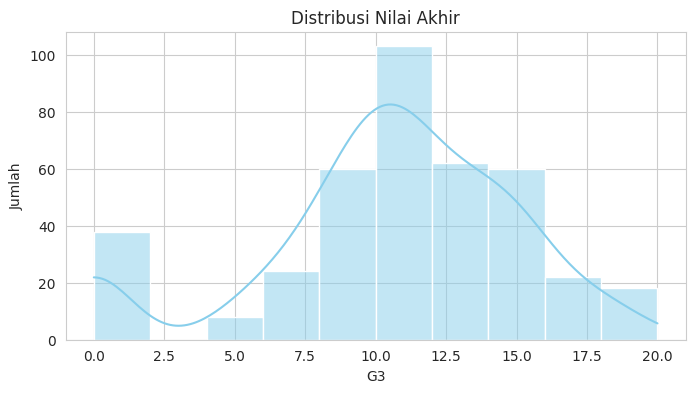

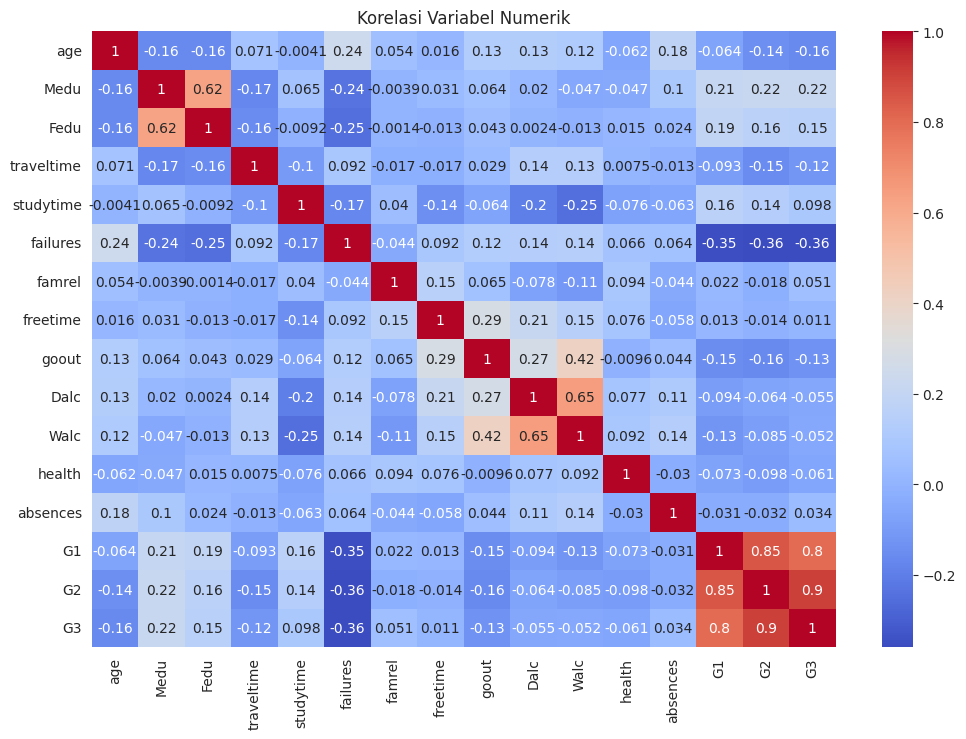

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv('student-mat.csv', sep=';')

print("\n" + "="*50)
print("1.1 Menampilkan 5 Data Teratas")
print("="*50)
print(data.head())

print("\n" + "="*50)
print("1.2 Informasi Dataset")
print("="*50)
data.info()

print("\n" + "="*50)
print("1.3 Statistik Deskriptif Data")
print("="*50)
print(data.describe())

plt.figure(figsize=(8,4))
sns.histplot(data['G3'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Nilai Akhir')
plt.xlabel('G3')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=['int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel Numerik')
plt.show()


2️⃣ Regresi Linier (studytime vs G3)


2. Regresi Linier Hasil
Intercept: 9.328260988559856
Slope: 0.5340011312423595
R-squared: 0.009568691683847441
MSE: 20.736143424347766


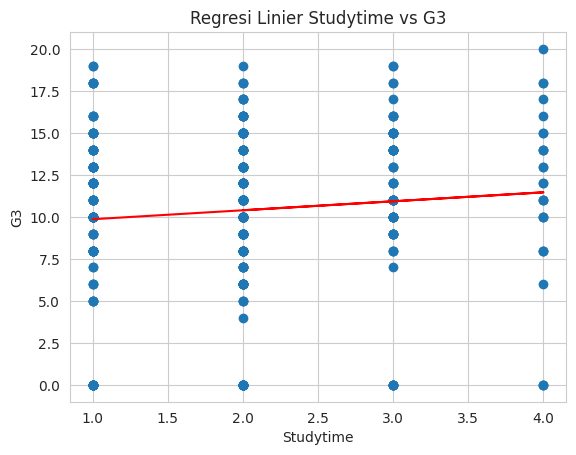

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['studytime']]
y = data['G3']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("\n" + "="*50)
print("2. Regresi Linier Hasil")
print("="*50)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R-squared:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

plt.scatter(data['studytime'], data['G3'])
plt.plot(data['studytime'], y_pred, color='red')
plt.xlabel('Studytime')
plt.ylabel('G3')
plt.title('Regresi Linier Studytime vs G3')
plt.show()


3️⃣ Clustering (K-Means dengan Absences)

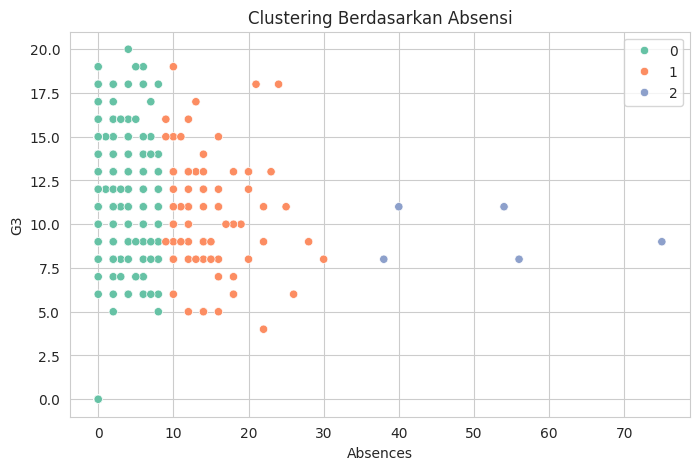


3. Jumlah Data per Cluster
Cluster
0    309
1     81
2      5
Name: count, dtype: int64


In [14]:
from sklearn.cluster import KMeans

X_clust = data[['absences']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_clust)

plt.figure(figsize=(8,5))
sns.scatterplot(x='absences', y='G3', hue='Cluster', data=data, palette='Set2')
plt.title('Clustering Berdasarkan Absensi')
plt.xlabel('Absences')
plt.ylabel('G3')
plt.legend()
plt.show()

print("\n" + "="*50)
print("3. Jumlah Data per Cluster")
print("="*50)
print(data['Cluster'].value_counts())


4️⃣ Klasifikasi (Decision Tree Classifier)


4. Evaluasi Klasifikasi Decision Tree
Accuracy: 0.6582278481012658
              precision    recall  f1-score   support

           0       0.50      0.30      0.37        27
           1       0.70      0.85      0.77        52

    accuracy                           0.66        79
   macro avg       0.60      0.57      0.57        79
weighted avg       0.63      0.66      0.63        79



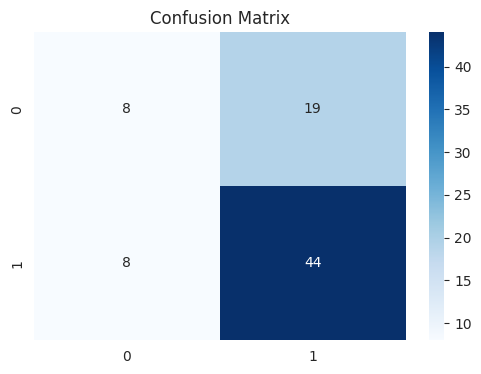

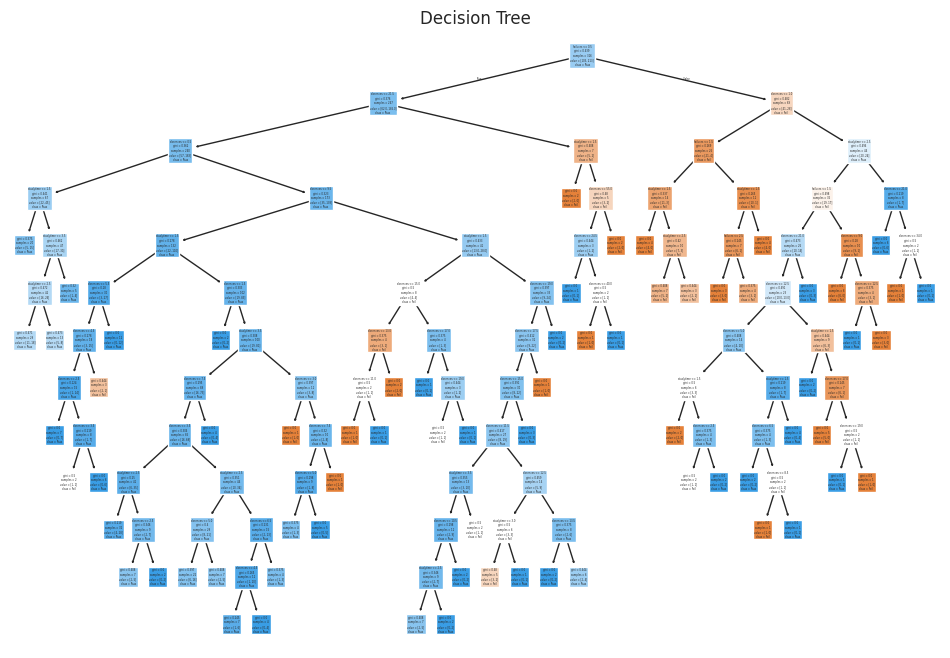

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data['Pass'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)
X_class = data[['studytime', 'failures', 'absences']]
y_class = data['Pass']

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n" + "="*50)
print("4. Evaluasi Klasifikasi Decision Tree")
print("="*50)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X_class.columns, class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree')
plt.show()
